In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
mm=pd.read_csv(r'summer.csv')

In [3]:
mm

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
mm['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [5]:
total_cities=len(mm['City'].unique())
total_cities

22

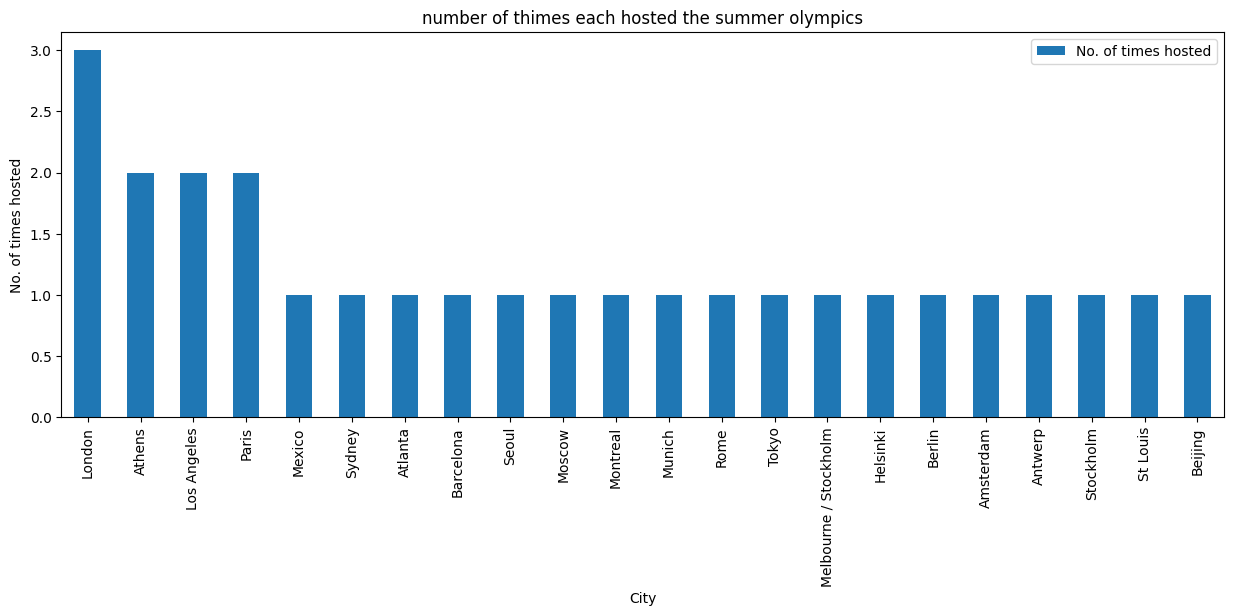

In [6]:
data = []
for city in mm['City'].unique():
    host_count = 0 
    for year in mm['Year'].unique():
        if len(mm[(mm["City"] == city) & (mm['Year'] == year)]) > 0:
            host_count += 1 
    data.append([city, host_count]) 
    
plot_data = pd.DataFrame(data,columns=['City','No. of times hosted']).sort_values(by='No. of times hosted',ascending=False)
plot_data.plot(x='City',y='No. of times hosted',kind='bar',figsize=(15,5))
plt.title('number of thimes each hosted the summer olympics')
plt.xlabel('City')
plt.ylabel('No. of times hosted')
plt.show()

In [7]:
gold=mm[mm['Medal']=='Gold']

In [8]:
data=[]
for sport in gold['Sport'].unique():
    data.append([sport,len(gold[gold['Sport']==sport])])

<Axes: xlabel='Sport'>

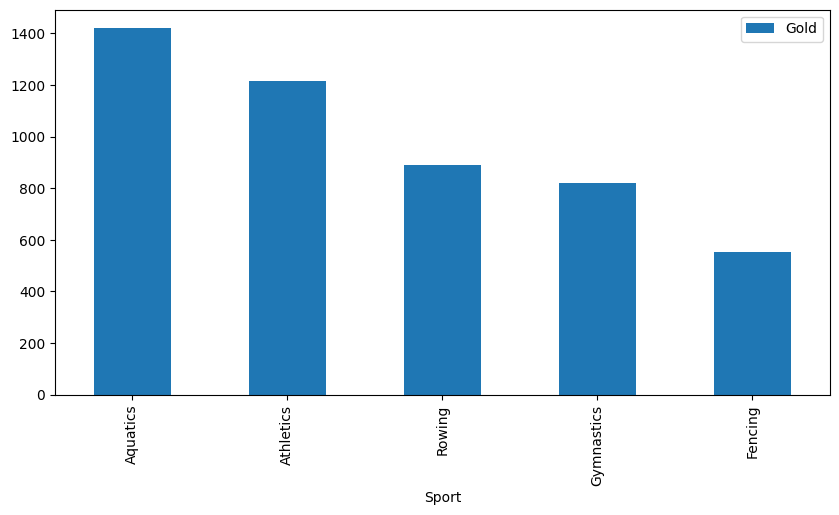

In [9]:
data=pd.DataFrame(data,columns=['Sport','Gold']).sort_values(by='Gold',ascending=False).head()
data.plot(x='Sport',y='Gold',kind='bar',figsize=(10,5))

<Axes: xlabel='Sport'>

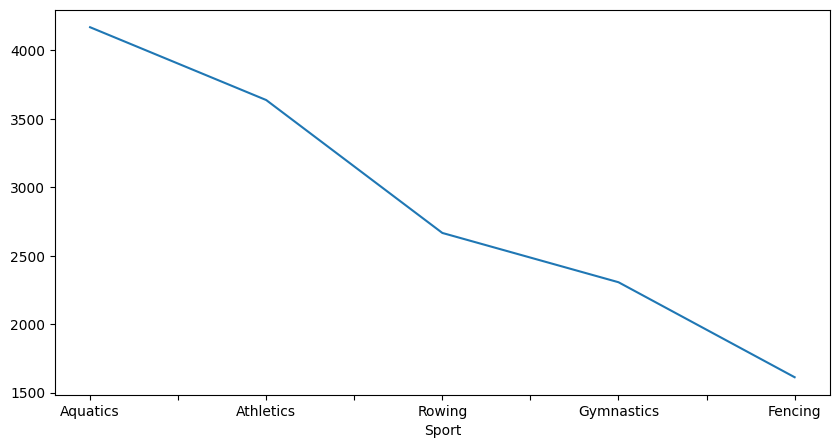

In [10]:
groupedsport=mm.groupby('Sport').count()['Medal']
groupedsport.sort_values(ascending=False).head().plot(figsize=(10,5))

<Axes: xlabel='Athlete'>

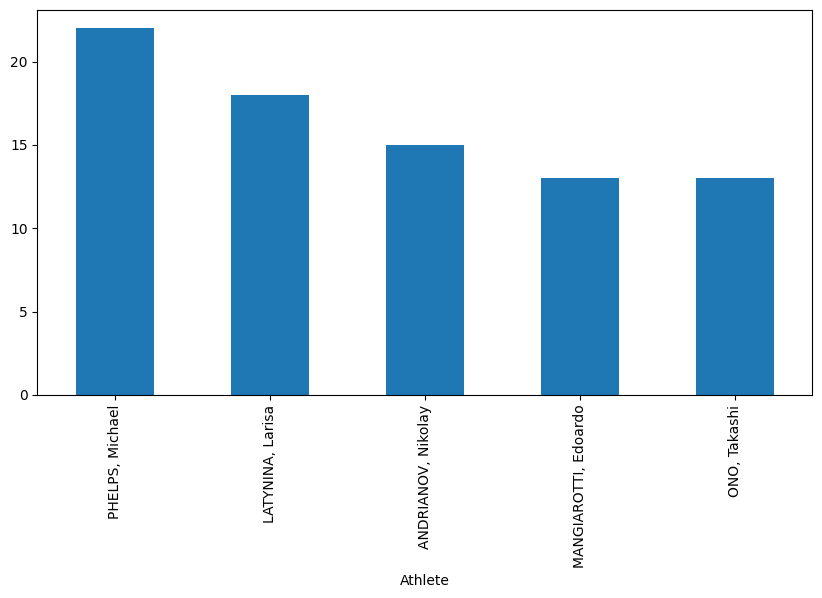

In [11]:
groupedplayer=mm.groupby('Athlete').count()['Medal']
groupedplayer.sort_values(ascending=False).head().plot(x='Athlete',y=groupedplayer,kind='bar',figsize=(10,5))

<Axes: xlabel='Athlete'>

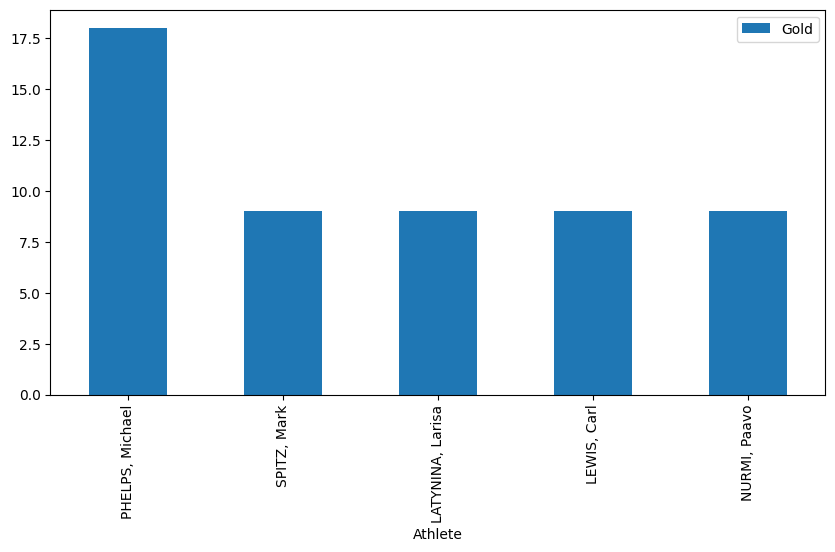

In [13]:
gold=mm[mm['Medal']=='Gold']
data=[]
for sport in gold['Athlete'].unique():
    data.append([sport,len(gold[gold['Athlete']==sport])])
data=pd.DataFrame(data,columns=['Athlete','Gold']).sort_values(by='Gold',ascending=False).head()
data.plot(x='Athlete',y='Gold',kind='bar',figsize=(10,5))

<Axes: xlabel='Sport'>

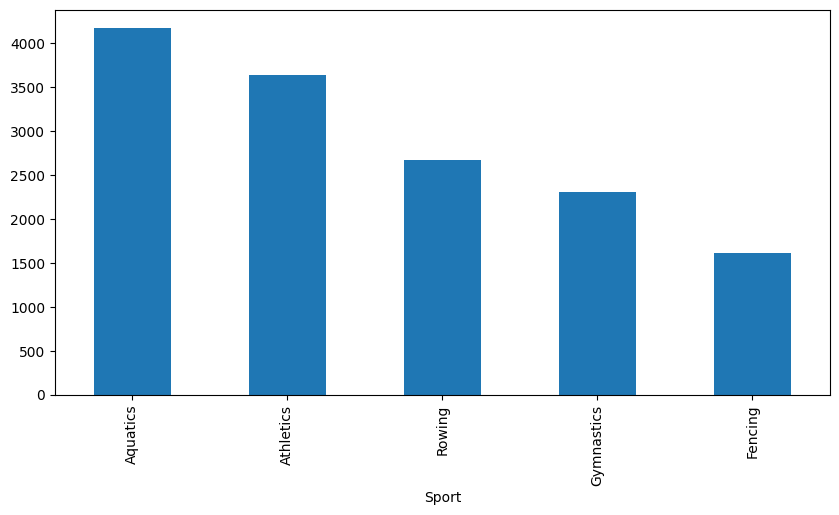

In [14]:
groupedsport=mm.groupby('Sport').count()['Medal']
groupedsport.sort_values(ascending=False).head().plot.bar(figsize=(10, 5))

In [16]:
gold[gold['Country'] == 'IND']['Year'].min()

np.int64(1928)

<Axes: xlabel='Event'>

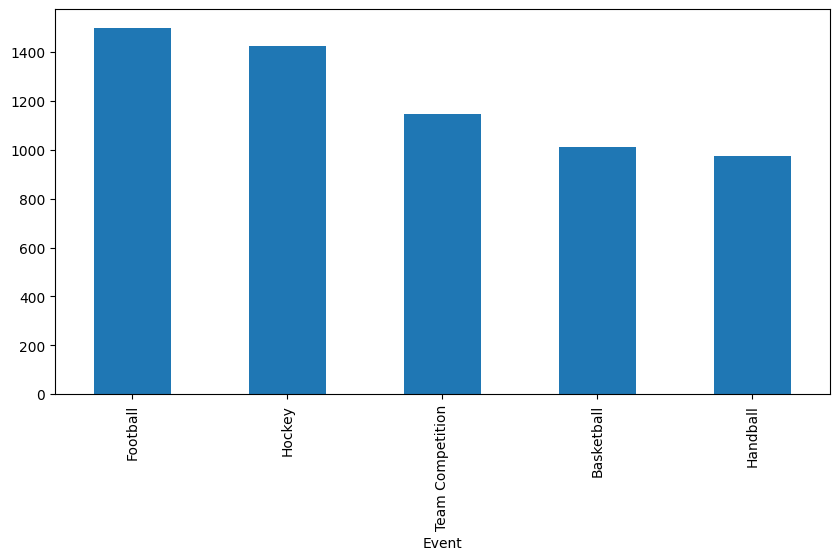

In [17]:
popularsport=mm.groupby('Event').count()['Athlete']
popularsport.sort_values(ascending=False).head().plot(x='Event',y=popularsport,kind='bar',figsize=(10,5))

In [24]:
gold_female= gold[(gold['Gender'] == 'women') & (gold['Medal'] == 'Gold')]

data = []

for sport in gold_female['Sport'].unique():
    count =gold_female[gold_female['Sport'] == sport].shape[0]
    data.append({'Sport': sport, 'GoldFemale': count})

df_sport = pd.DataFrame(data,columns=['Sport','GoldFemale'])
df_sport=df_sport.sort_values(by='GoldFemale', ascending=False).head(5)


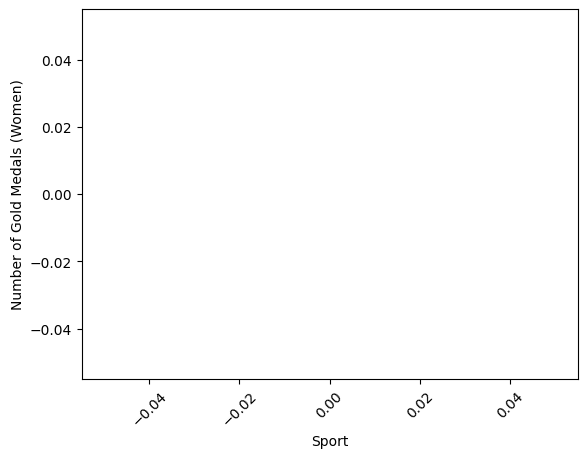

In [26]:
plt.bar(df_sport['Sport'], df_sport['GoldFemale'], color='gold')
plt.xlabel('Sport')
plt.ylabel('Number of Gold Medals (Women)')
plt.xticks(rotation=45)
plt.show()